# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hidayat Hatta Irsyad
- **Email:** hidayat.hatta1397@student.unri.ac.id
- **ID Dicoding:** hidayat_hatta_irsyad

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah pengguna sepeda?
- Bagaimana tren penggunaan sepeda berdasarkan jam di sepanjang tahun?
- Bagaimana peforma penyewaan sepada per harinya?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Membuat tabel data 'day'
day_df = pd.read_csv("bike_data\\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Membuat tabel data 'hour'
hour_df = pd.read_csv("bike_data\\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data 'dteday' seharusnya 'date'
- Tipe data kolom "season, yr, mnth, holiday, weekday, workingday, dan weathersit" dari 'float64' seharusnya menjadi 'category'
- Tidak ada data duplikasi

### Cleaning Data

- Mengubah tipe data kolom dtday dari 'object' menjadi 'datetime'
- Mengubah tipe data kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit dari 'float64' menjadi 'category' karena merepresentasikan kategori terbatas dan juga membantu efisiensi memori dan memperjelas jenis data.
- Menghapus kolom instant karena kolom ini tidak membawa informasi yang relevan untuk analisis.
- Mengganti nama kolom agar mudah dibaca
- Mengganti nilai dari kolom agar mudah dipahami

In [5]:
#Mengganti tipe data pada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [6]:
#Mengganti tipe data dari 'float64' menajadi 'category'
columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
 
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [7]:
#Menghapus kolom instant
hour_df.drop(['instant'], axis = 1, inplace= True)
day_df.drop(['instant'], axis = 1, inplace= True)

In [8]:
#Mengganti nama kolom
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'cnt': 'total_users',
    'windspeed': 'wind_speed',
    'weekday': 'day_of_week'
}, inplace=True)

day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'cnt': 'total_users',
    'windspeed': 'wind_speed',
    'weekday': 'day_of_week'
}, inplace=True)

In [9]:
# Mengganti nilai pada kolom 'season'
hour_df['season'] = hour_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
day_df['season'] = day_df['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Mengganti nilai pada kolom 'year' dengan replace
hour_df['year'] = hour_df['year'].cat.rename_categories({0: '2011', 1: '2012'})
day_df['year'] = day_df['year'].cat.rename_categories({0: '2011', 1: '2012'})

# Mengganti nilai pada kolom 'month'
hour_df['month'] = hour_df['month'].cat.rename_categories({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
day_df['month'] = day_df['month'].cat.rename_categories({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Mengganti nilai pada kolom 'holiday'
hour_df['holiday'] = hour_df['holiday'].cat.rename_categories({0: 'No', 1: 'Yes'})
day_df['holiday'] = day_df['holiday'].cat.rename_categories({0: 'No', 1: 'Yes'})

# Mengganti nilai pada kolom 'day_of_week'
hour_df['day_of_week'] = hour_df['day_of_week'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['day_of_week'] = day_df['day_of_week'].cat.rename_categories({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

# Mengganti nilai pada kolom 'workingday'
hour_df['workingday'] = hour_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})
day_df['workingday'] = day_df['workingday'].cat.rename_categories({0: 'No', 1: 'Yes'})

# Mengganti nilai pada kolom 'weather_situation'
hour_df['weather_situation'] = hour_df['weather_situation'].cat.rename_categories({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice Pallets'})
day_df['weather_situation'] = day_df['weather_situation'].cat.rename_categories({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Ice Pallets'})


In [16]:
hour_df.head()

,date,season,year,month,hour,holiday,day_of_week,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual,registered,total_users
0,2011-01-01,Winter,2011,January,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,January,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,January,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,January,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,January,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
day_df.head()

,date,season,year,month,holiday,day_of_week,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual,registered,total_users
0,2011-01-01,Winter,2011,January,No,Saturday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,January,No,Sunday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,January,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,January,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,January,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Mengubah tipe data kolom dtday dari 'object' menjadi 'datetime'. ✔
- Mengubah tipe data kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit dari 'float64' menjadi 'category' karena merepresentasikan kategori terbatas dan juga membantu efisiensi memori dan memperjelas jenis data. ✔
- Menghapus kolom instant karena kolom ini tidak membawa informasi yang relevan untuk analisis. ✔
- Mengganti nama kolom agar mudah dibaca. ✔
- Mengganti nilai dari kolom agar mudah dipahami. ✔

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
day_df.describe(include="all")

,date,season,year,month,holiday,day_of_week,workingday,weather_situation,temperature,feels_like_temperature,humidity,wind_speed,casual,registered,total_users
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Summer,2012,January,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
day_df.groupby(by="season", observed=False)['total_users'].sum().sort_values(ascending=False).reset_index(0)

,season,total_users
0,Summer,1061129
1,Spring,918589
2,Fall,841613
3,Winter,471348


Terlihat pada musim summer memiliki total pengguna paling banyak

In [20]:
day_df.groupby(by="year", observed=False).agg({"registered": ["sum"], "casual": ["sum"]})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan tabel di atas dapat dilihat bahwa selisih yang cukup jauh antara yang sudah memiliki member dan yang belum memiliki member.

In [21]:
day_df.groupby(by="holiday", observed=False)['total_users'].sum()

holiday
No     3214244
Yes      78435
Name: total_users, dtype: int64

Terlihat bahwa total penyewaan sepeda pada hari biasa lebih banyak daripada hari libur.

In [22]:
hour_df.describe()

,date,hour,temperature,feels_like_temperature,humidity,wind_speed,casual,registered,total_users
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 17379 orang. Dengan range jam antara pukul 00.00 hingga pukul 23.00  dengan rata-rata penyewaan pada pukul 11.54 dengan standar deviasinya sebesar 6.91.

In [23]:
#Melihat total penyewaan berdasarkan jam
hour_df.groupby(by="hour", observed=False).agg({
    "total_users": "sum"
}).sort_values(by="total_users", ascending=False)

,total_users
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Terlihat bahwa pada jam 17.00 memiliki total pelanggan yng paling banyak dan pada jam 04.00 memiliki pelanggan paling sedikit

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

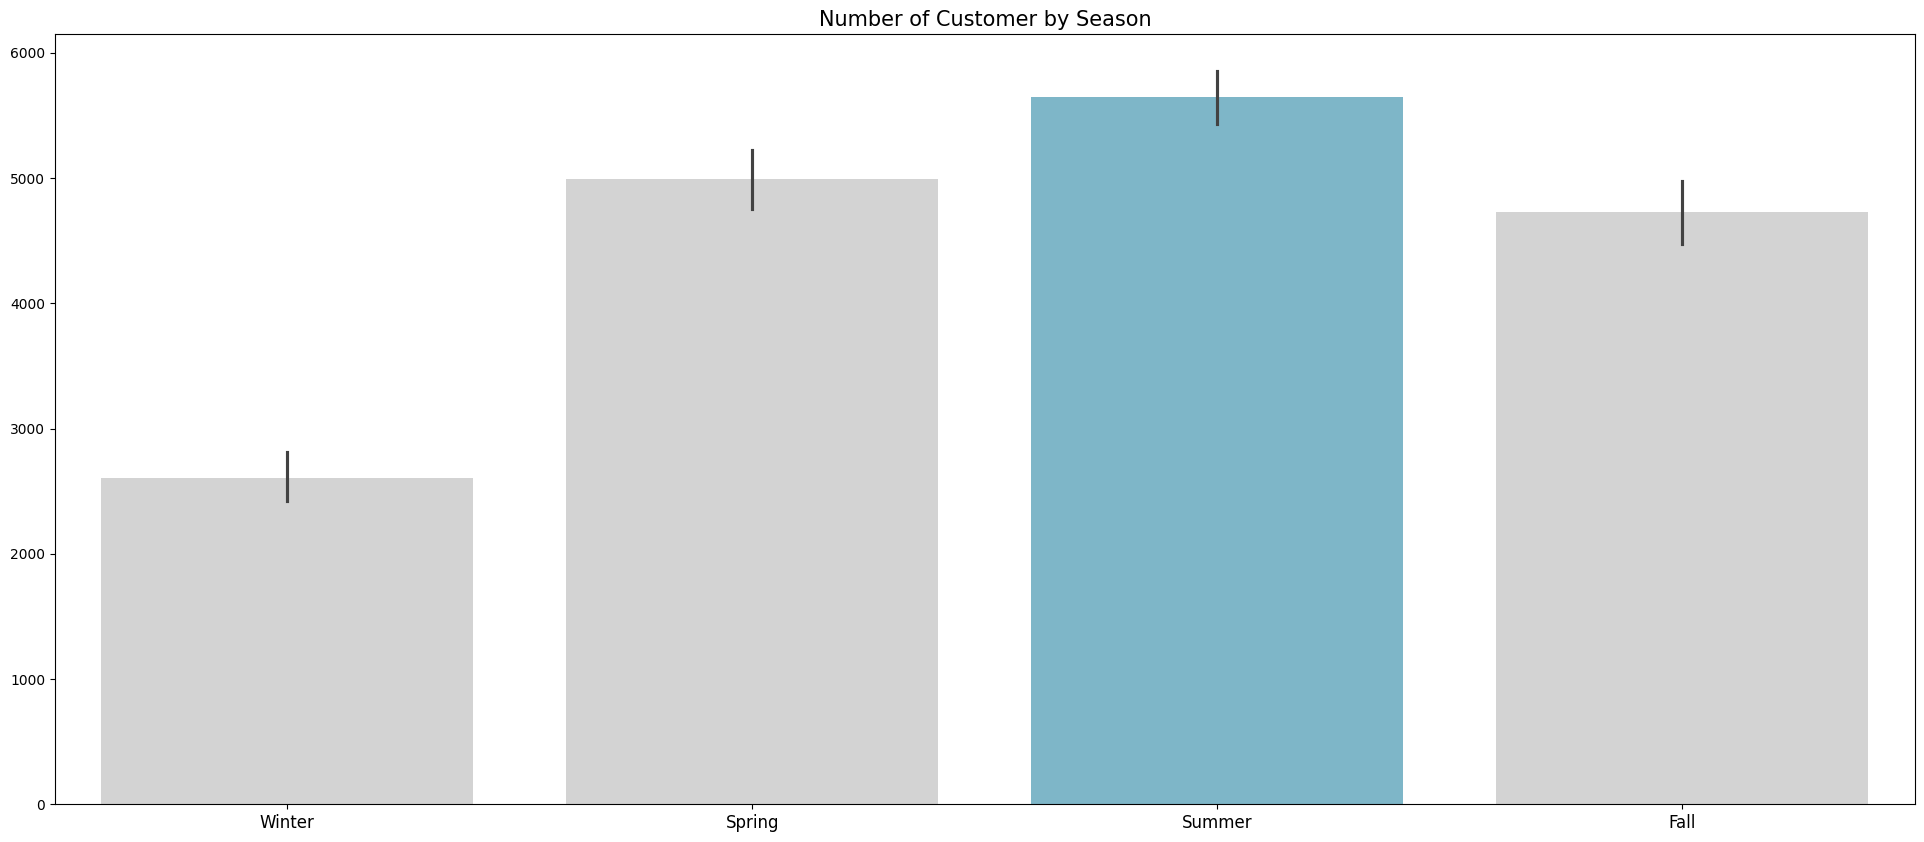

In [24]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]  # Sesuaikan dengan jumlah bar

fig, ax = plt.subplots(figsize=(24, 10))

sns.barplot(
    y="total_users", 
    x="season",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    hue="season",
    dodge=False,
    legend=False
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Secara umum, cuaca yang lebih baik atau hangat, seperti musim panas, cenderung meningkatkan jumlah penyewaan sepeda. Summer memiliki jumlah penyewaan sepeda tertinggi. Sedangkan Winter menunjukkan jumlah penyewaan sepeda yang paling sedikit, yang mungkin terkait dengan kondisi cuaca yang kurang ideal untuk bersepeda.

### Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan jam di sepanjang tahun?

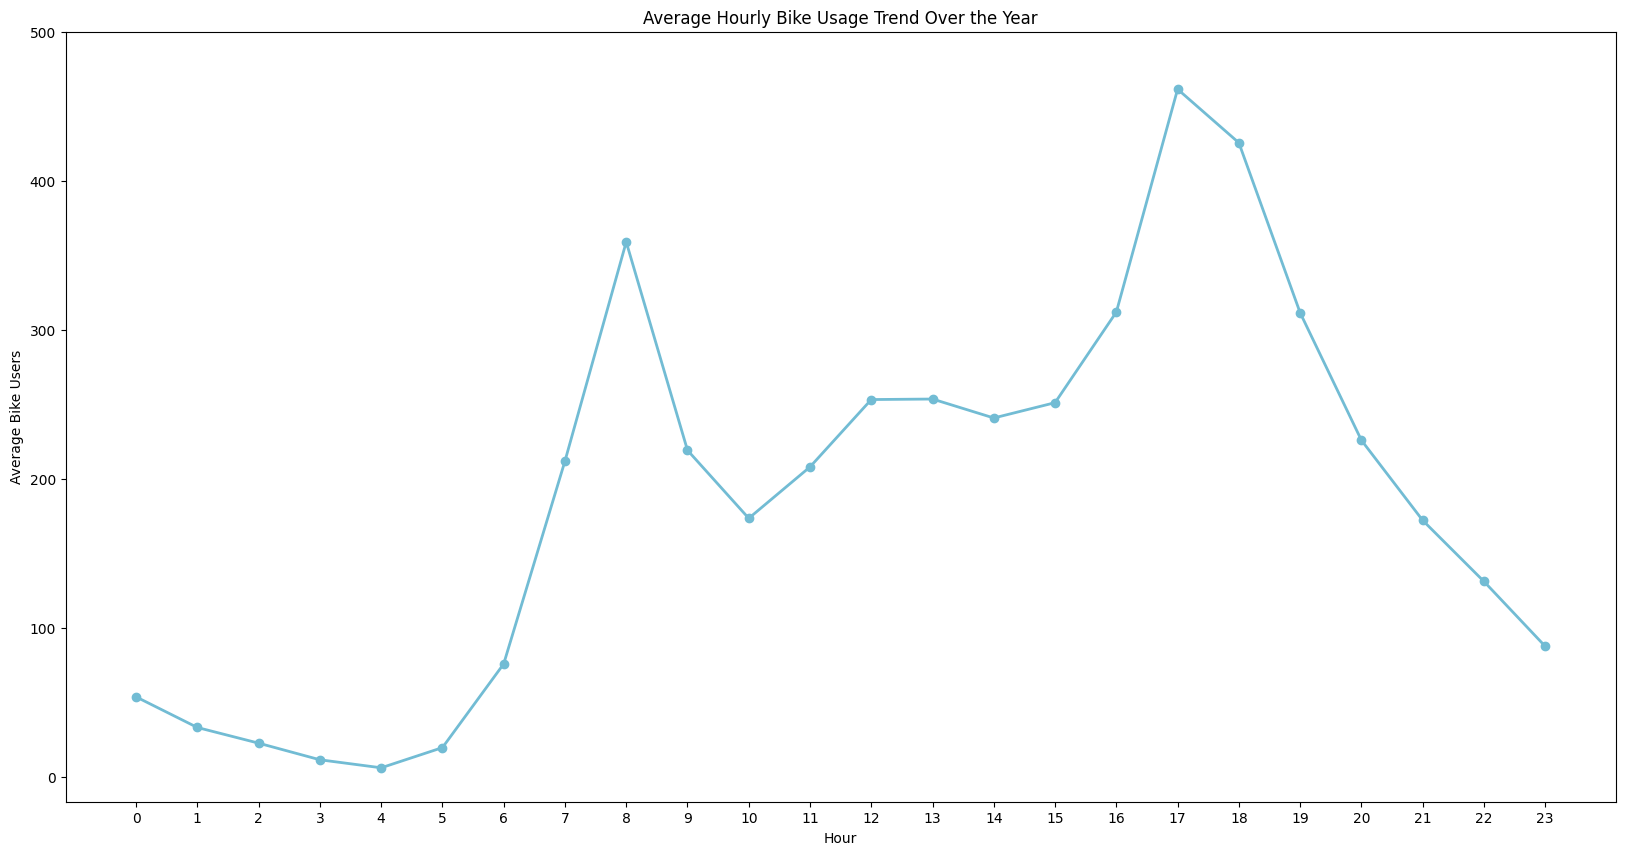

In [25]:
hourly_trend = hour_df.groupby(['date', 'hour'])['total_users'].sum().unstack()

# Plotting hourly trend
plt.figure(figsize=(20, 10))

plt.plot(hourly_trend.mean(axis=0).index, hourly_trend.mean(axis=0).values, marker='o', linewidth=2, color="#72BCD4")

plt.title('Average Hourly Bike Usage Trend Over the Year')
plt.xlabel('Hour')
plt.ylabel('Average Bike Users')
plt.xticks(range(0, 24))
plt.yticks(range(0, 600, 100))
plt.show()

Terlihat rata-rata penyewaan paling tinggi pada jam 17.00 di sepanjang tahun.

### Pertanyaan 3: Bagaimana peforma penyewaan sepada per harinya?

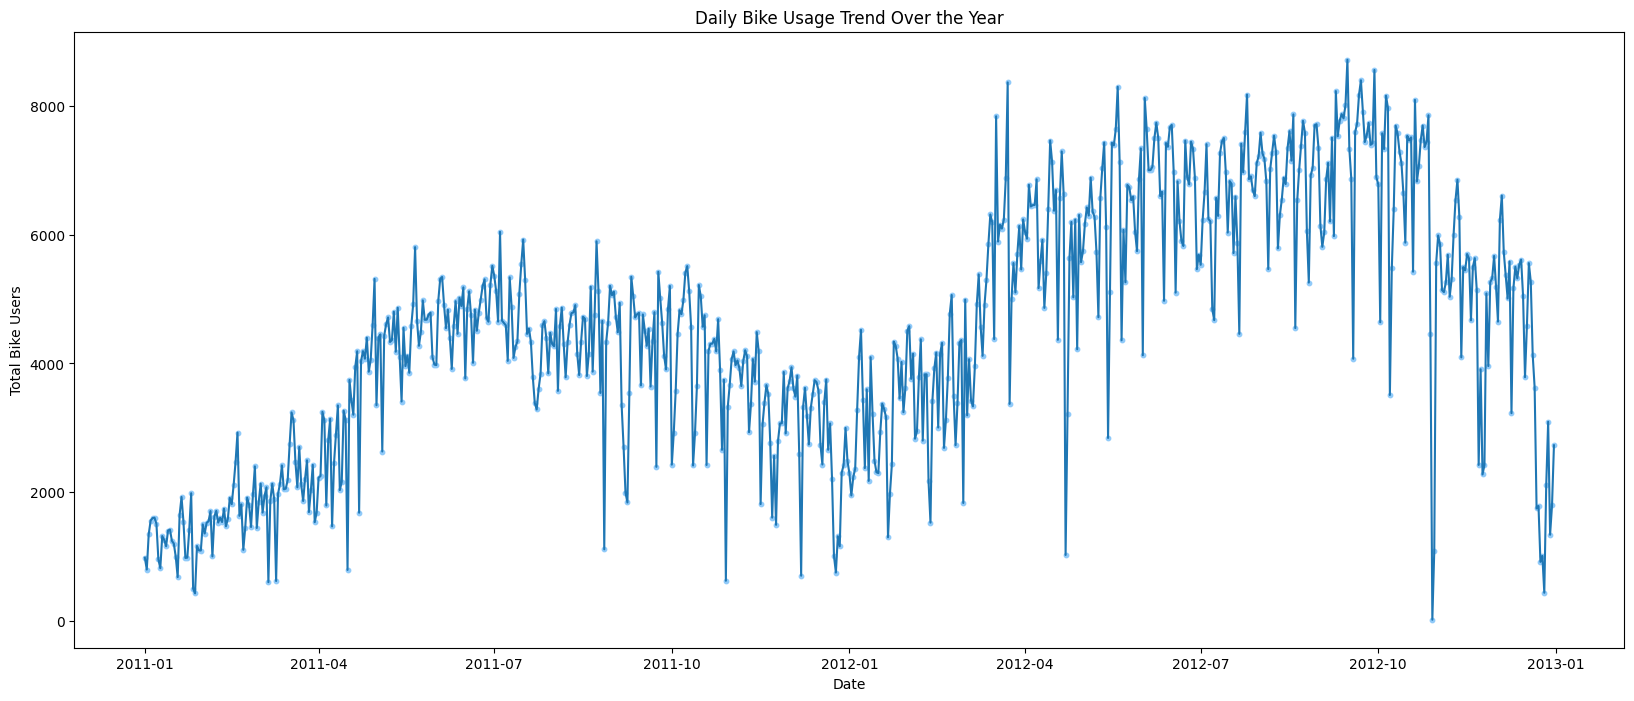

In [26]:
trend = day_df.groupby('date')['total_users'].sum()

plt.figure(figsize=(20, 8))

plt.scatter(trend.index, trend.values, c="#90CAF9", s=10, marker='o')
plt.plot(trend.index, trend.values)
plt.title('Daily Bike Usage Trend Over the Year')
plt.xlabel('Date')
plt.ylabel('Total Bike Users')
plt.show()

Terlihat penyewaan sepeda tertinggi pada bulan September 2023, tetapi terdapat penurunan yang cukup signifikan pada bulan November dan Desember 2023

## Analisis Lanjutan

#### Clustering (Manual grouping)

1. Membuat group berdasarkan jam
- Peak Hour (perjalanan pagi: 07.00 - 09.00, perjalanan sore: 17.00 - 19.00)
- Off-peak (jam-jam lainnya)
2. Membuat group berdasarkan cuaca
- Good Weather (Weather situation berupa clear dan partly cloudy)
- Bad weather (Weather situation lainnya)
3. Membuat group berdasarkan total users
- Hight usage (total user berjumlah lebih dari 1000)
- Moderate usage (total user diantara 500 sampai dengan 1000)
- Low usage (total user kurang dari 500)

In [16]:
# Membuat group berdasarkan jam (peak vs off-peak)
def time_group(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Peak'
    else:
        return 'Off-Peak'

# Membuat group berdasarkan cuaca (good vs bad weather)
def weather_group(weather_situation):
    if weather_situation in ['Clear', 'Partly Cloudy']:
        return 'Good Weather'
    else:
        return 'Bad Weather'

# Membuat group berdasarkan total users (high, moderate, low)
def usage_group(total_users):
    if total_users > 1000:
        return 'High Usage'
    elif 500 <= total_users <= 1000:
        return 'Moderate Usage'
    else:
        return 'Low Usage'

hour_df['Time Group'] = hour_df['hour'].apply(time_group)
hour_df['Weather Group'] = hour_df['weather_situation'].apply(weather_group)
hour_df['Usage Group'] = hour_df['total_users'].apply(usage_group)

hour_df[['hour', 'Time Group', 'weather_situation', 'Weather Group', 'total_users', 'Usage Group']].head()

,hour,Time Group,weather_situation,Weather Group,total_users,Usage Group
0,0,Off-Peak,Clear,Good Weather,16,Low Usage
1,1,Off-Peak,Clear,Good Weather,40,Low Usage
2,2,Off-Peak,Clear,Good Weather,32,Low Usage
3,3,Off-Peak,Clear,Good Weather,13,Low Usage
4,4,Off-Peak,Clear,Good Weather,1,Low Usage


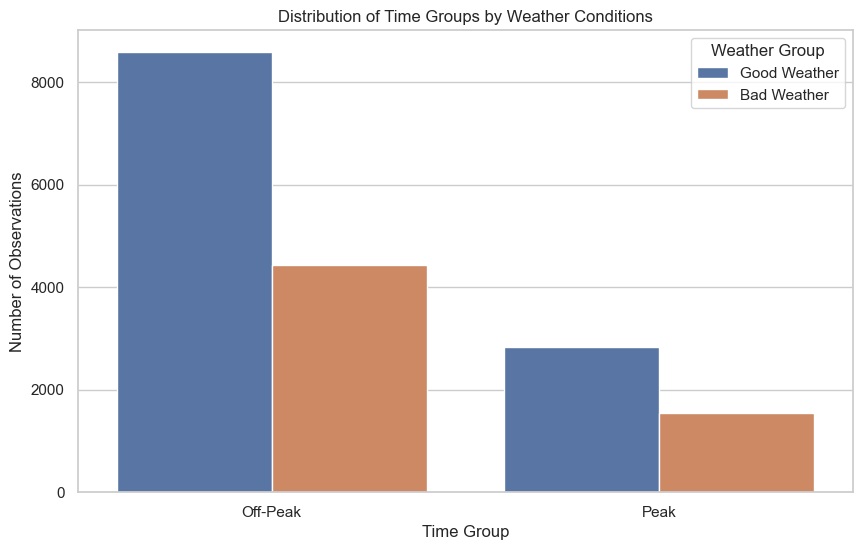

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=hour_df, x='Time Group', hue='Weather Group')
plt.title('Distribution of Time Groups by Weather Conditions')
plt.ylabel('Number of Observations')
plt.show()

Dari data visual di atas kita dapat melihat perbandingan antara kondisi off-peak dan juga peak dengan jumlah penyewa.

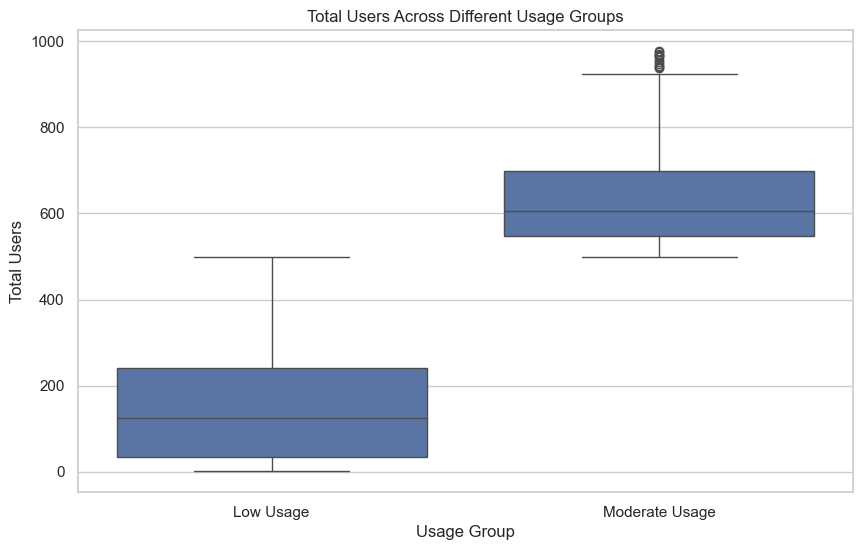

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_df, x='Usage Group', y='total_users')
plt.title('Total Users Across Different Usage Groups')
plt.ylabel('Total Users')
plt.show()

Dari data visual di atas kita dapat melihat Pusat Data atau Median dari data. Penyebaran Data, Rentang data, Skewness (Kemiringan) data, dan Outlier data dari kategori usage group yang dibuat.

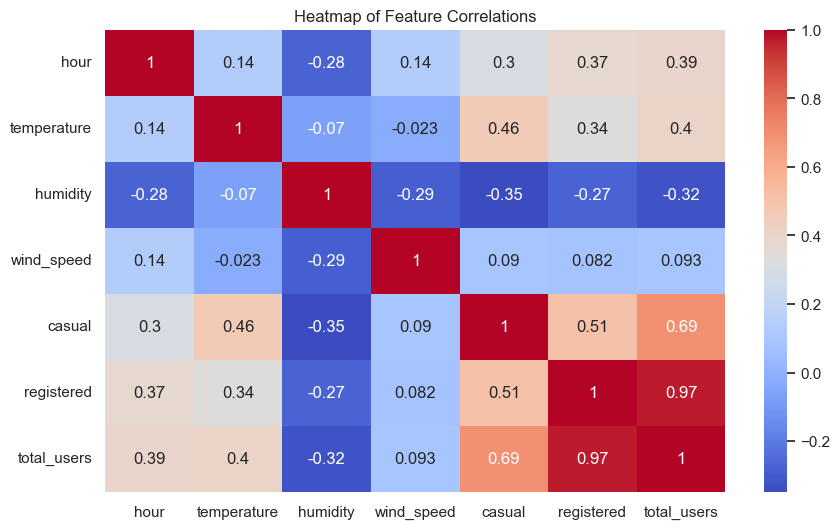

In [20]:
plt.figure(figsize=(10, 6))
correlation_matrix = hour_df[['hour', 'temperature', 'humidity', 'wind_speed', 'casual', 'registered', 'total_users']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

Dapat dilihat dari visualisasi data di atas, Merah: Korelasi positif yang kuat. Artinya, ketika nilai satu variabel naik, nilai variabel lainnya cenderung naik juga. Biru: Korelasi negatif yang kuat. Artinya, ketika nilai satu variabel naik, nilai variabel lainnya cenderung turun. Putih: Korelasi yang lemah atau tidak ada korelasi.

## Conclusion

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Data menunjukkan bahwa saat cuaca summer jumlah penyewa memiliki user yang paling banyak, sedangkan ketika winter jumlah penyewa menempati posisi paling bawah
- Kondisi summer mendukung pengguna sepeda lebih baik dari pada ketika cuaca winter karena akan mengganggu pengguna sepeda akibat hujan atau salju yang ada.
- Pihak layanan bisa saja memberikan diskon atau promo untuk meningkatkan jumlah penyewaan pada saat winter. Penyedia layanan juga bisa memberika fasilitas yang lebih bagus seperti penggunaan sepeda listrik yang memiliki sistem penghangat.
2. Bagaimana tren penyewaan sepeda berdasarkan jam di sepanjang tahun?
- Penyewaan tertinggi terdapat pada jam 17.00 disepanjang tahun, sedangkan penyewaan terendah terdapat pada pukul 04.00.
- Kenaikan pada pukul 17.00 mungkin terjadi karena merupakan waktu yang pas ketika orang balik dari kerja ataupun dari sekolah.Trand ini terjadi pada pukul 17.00 sepanjang tahun tetapi memiliki sedikit variasi.
- Optimalkan jumlah sepeda pada jam-jam yang ramai penyewa terutama jam 17.00 sehingga dapat meningkatkan peforma bisnis dan kenyamanan pelanggan, bisa juga membuat pre-order untuk menanggulangi lonjakan penyewa yang ada.
3. Bagaimana peforma penyewaan sepada per harinya?
- Pada bulan September dan Oktober 2013 merupakan tingkat penyewaan tertinggi, namun terdapat penurunan signifikan pada bulan November dan Desember 2013.
- Pada bulan september memiliki cuaca yang mendukung untuk aktivitas diluar ruangan termasuk bersepeda, itu mengapa penyewaan pada bulan september memiliki trand yang tinggi, sedangkan pada November dan Desember memiliki cuaca yang tidak mendukung beraktivitas diluar ruangan.
- Membuat strategi untuk bulan bulan yang memiliki pengurangan pelanggan secara derastis untuk menjaga peforma dan stabilitas bisnis. Berkolaborasi dengan acara lokal atau festifal musiman yang bisa menarik peminat atau pelanggan baru.

Cuaca dan waktu sangat mempengaruhi performa penyewaan sepeda. Penyedia layanan dapat memanfaatkan insight ini untuk menyesuaikan operasional, seperti menambah armada pada jam sibuk dan merancang strategi promosi untuk menjaga volume penyewaan selama periode rendah.

In [10]:
day_df.to_csv("clean_data_day.csv", index=False)

In [11]:
hour_df.to_csv("clean_data_hour.csv", index=False)